In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# The Pandas Python Library

The pandas library is used to deal with structured data stored in tables. You might aquire the structured data from CSV files, TSV files, SQL database tables, or spreadsheets. You can also *create* pandas Series and DataFrames. 

**You can think of a pandas DataFrame like a table in SQL, Excel, or Google Sheets and a pandas Series like a single column from a table.** 

![dataframe diagram](https://www.w3resource.com/w3r_images/pandas-data-structure.svg)

[Image Source](https://www.w3resource.com/python-exercises/pandas/index.php)

# The Pandas Series Object

## <font color=red>What Is a Pandas Series?</font>

A pandas Series object is a one-dimensional, labeled array made up of an autogenerated index that starts at 0 and data of a single data type. A couple of important things to note here:

- If I try to make a pandas Series using multiple data types like `int` and `string` values, the data will be converted to the same `object` data type; the `int` values will lose their `int` functionality. 

- `NaN` values are categorized as data type `float`, so if I have missing values in a Series of `int` data type values, the integers will be converted to floats. If I see this behavior occur, it might alert me to the fact that I have some missing values.

A pandas Series can be created in several ways, some of which I'll demonstrate below, but **it will most often be created by pulling a single column from a pandas Dataframe in which case the Series has the same index as the Dataframe.** 

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Create a Pandas Series:

#### From a Python List

In [48]:
# Here I create a list of colors 'colors'.

colors = ['red', 'yellow', 'green', 'blue', 'orange', 'red', 'violet', 'indigo']
colors

['red', 'yellow', 'green', 'blue', 'orange', 'red', 'violet', 'indigo']

In [99]:
# Here I create the 'colors_series' Series using the Series() constructor method.

color_series = pd.Series(colors)
color_series

0       red
1    yellow
2     green
3      blue
4    orange
5       red
6    violet
7    indigo
dtype: object

In [26]:
# I can see that color_series is now a pandas Series object.



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### From a NumPy Array

In [27]:
# Create a numpy array 'arr'.

arr = np.array([5, 10, 15, 20, 25, 30, 35, 40, 40])

In [49]:
# Convert my numpy array to a pandas Series called 'numeric_series'.

numeric_series = pd.Series(arr)
numeric_series

0     5
1    10
2    15
3    20
4    25
5    30
6    35
7    40
8    40
dtype: int64

In [29]:
# Confirm the conversion.



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### From a Python Dictionary. 

- Here the dictionary keys are used to construct the index.

In [30]:
# Create a python dictionary.

data = {'a' : 0, 'b' : 1.5, 'c' : 2, 'd': 3.5, 'e': 4, 'f': 5.5}
data

{'a': 0, 'b': 1.5, 'c': 2, 'd': 3.5, 'e': 4, 'f': 5.5}

In [67]:
# Create a pandas Series 'diction_series' using the pandas Series() constructor method.

diction_series = pd.Series(data)
diction_series

a    0.0
b    1.5
c    2.0
d    3.5
e    4.0
f    5.5
dtype: float64

In [32]:
# Confirm the type of 'diction_series.'



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### From a Pandas DataFrame

**When I pull a column from a pandas DataFrame, this is also a Series object. It will retain the same index as the DataFrame.**

*This is just a preview of acquiring data from a database as a DataFrame. For now, focus on the Series, not the code reading in the data. We will get plenty of practice using pandas functions to acquire data in the near future.*

In [72]:
from env import host, password, user

def get_connection(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [85]:
sql_query = '''
            SELECT 
                first_name,
                last_name,
                dept_name
            FROM employees AS e
            JOIN dept_emp AS de ON e.emp_no = de.emp_no
                AND to_date > CURDATE()
            JOIN departments AS d USING(dept_no)
            '''

In [86]:
df = pd.read_sql(sql_query, get_connection('employees'))

In [87]:
# This is a pandas DataFrame from which I will pull the Series I want to use in examples.

df.head(10)

,first_name,last_name,dept_name
0,Huan,Lortz,Customer Service
1,Basil,Tramer,Customer Service
2,Breannda,Billingsley,Customer Service
3,Jungsoon,Syrzycki,Customer Service
4,Yuichiro,Swick,Customer Service
5,Kayoko,Valtorta,Customer Service
6,Babette,Lamba,Customer Service
7,Maren,Hutton,Customer Service
8,Abdulah,Thibadeau,Customer Service
9,Jagoda,Braunmuhl,Customer Service


**For now, all you need to know is that a Series can be created from a DataFrame in one of the following ways:**

- **By Passing a Column Name as a String to the Indexing Operator *aka Bracket Notation*.**

```python
df['series']
```

In [88]:
# Grab a Series using bracket notation. Assign it to a variable called 'names'.

names = df['first_name']
names

0             Huan
1            Basil
2         Breannda
3         Jungsoon
4         Yuichiro
            ...   
240119     Mihalis
240120    Guozhong
240121        Gino
240122      Nathan
240123       Rimli
Name: first_name, Length: 240124, dtype: object

In [90]:
# Validate the object type of 'names'.

type(names)

pandas.core.series.Series

- **Using Attribute Access *aka Dot Notation*.**

```python
df.series
```

In [89]:
# Grab a Series using dot notation. Assign it to a variable called 'dept_names'.

dept_name = df.dept_name
dept_names

0         Customer Service
1         Customer Service
2         Customer Service
3         Customer Service
4         Customer Service
                ...       
240119               Sales
240120               Sales
240121               Sales
240122               Sales
240123               Sales
Name: dept_name, Length: 240124, dtype: object

In [92]:
# Validate the object type of 'dept_name'.

type(dept_names)

pandas.core.series.Series

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

## <font color=orange>So What's So Great About a Pandas Series?</font>

A Series can be made up of any data type, it allows for indexing and subsetting of data, and comes with many useful attributes and methods adding an enormous array of functionality to this pandas object. One of the most impressive features of pandas is that it offers vectorized functions optimized to operate on Series (and DataFrame) objects; that means that I can call a function on an entire Series instead of a single string or scalar value. 

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Attributes

**Attributes** return useful information about the object's properties. Jupyter Notebook allows you to quickly access a list of available attributes by pressing the tab key after the series name followed by a period or dot; this is called dot notation or attribute access.

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Common Attributes

#### `.index` and `values`

**The Components of a Pandas Series - Index, Data**

- Now that I have a pandas Series to work with, I can look at the components of the Series object using the `.index` and the `.values` attributes.

In [5]:
# I can access its autogenerated index by using the .index attribute.



In [6]:
# I can access its data by using the .values attribute.



In [7]:
# I can see that accessing the data in my Series using the .values attribute returns a numpy array.



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.dtype`

- The `.dtype` attribute returns the pandas data type for the Series. 

**Below is a helpful overview of pandas data types and their relation to python and NumPy data types.**

![pandas data types](https://pbpython.com/images/pandas_dtypes.png)

In [19]:
# What is the data type of our 'color_series' Series?



In [20]:
# What is the data type of our 'numeric_series' Series?



In [21]:
# What is the data type of our 'names' Series?



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.size`

The `.size` attribute returns an int representing the number of rows in the Series.

In [22]:
# What is the size of our 'color_series' Series?



In [ ]:
# What is the size of our 'numeric_series' Series?



In [ ]:
# What is the size of our 'names' Series?



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.shape`

The `.shape` attribute returns a tuple representing the rows and columns in a DataFrame, but it can also be used on a Series to return the rows. 

In [23]:
# What is the shape of our 'names' Series?



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

## <font color=green>Now What?</font>

### Methods

**Methods** used on pandas Series objects often return new Series objects; most also offer parameters with default settings designed to keep the user from mutating the original Series objects. I can either assign the transformed Series to a variable or adjust my parameters. 

<div class="alert alert-block alert-warning">Be careful about mutating your original data, and always, always confirm that the data you are working with is the data, and data type, that you think you are working with!</div>

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.head()`, `.tail()`, and `.sample()`

The `.head(n)` method returns the first n rows in the Series; n = 5 by default. This method returns a new Series with the same indexing as the original Series. 

The `.tail(n)` method returns the last n rows in the Series; n = 5 by default. Increase or decrease your value for n to return more or less than 5 rows.

The `.sample(n)` method returns a random sample of rows in the Series; n = 1 by default. Again, the index is retained.

In [43]:
# Grab the first five rows in our 'names' Series; the default is the first 5 rows.



In [44]:
# Grab the last two rows of the 'names' Series; we can pass 2 as our argument to n.



In [45]:
# Grab a random sample of 10 rows from the 'names' Series; the default argument is 1.



In [46]:
# What type of object is returned by the `.head()`, `.tail()`, or `.sample()` methods?



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.astype()`

The `.astype()` method allows me to convert a Series from one data type to another. Like most methods, it returns a new transformed Series by default instead of mutating my original data.

In [58]:
# How can I change the data type of `numeric_series` to an object?



In [59]:
# Did this transform the data type of my 'numeric_series'?



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.value_counts()`

The `.value_counts()` method returns a new Series consisting of the values from the original Series as the index labels and values consisting of the frequency of occurance of the unique labels in the original Series. This is an extremely useful method you will find yourself using often with Series containing object and category data types. 

Below you can see the default settings for the method's parameters.

```python
series.value_counts(
    normalize=False,
    sort=True,
    ascending=False,
    bins=None,
    dropna=True,
)
```

In [60]:
# How can I obtain the frequency of unique values in 'color_series'?



In [61]:
# How can I obtain the relative frequency of the unique values in 'color_series'?



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.sort_values()` and `.sort_index()`

- These are handy methods that allow you to either sort your values or index respectively in ascending or descending order.

In [71]:
# How can I obtain my 'colors_series' with the values in alphabetical order?



In [ ]:
# How can I reverse the order?



In [66]:
# How can I obtain my 'numeric_series' ordered from least to greatest values?



In [ ]:
# How can I reverse the order?



In [70]:
# How can I sort my labeled index in 'diction_series' to be in reverse alphabetical order?



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.describe()`

- The `.describe()` method can be used to return descriptive statistics on either a pandas Series or DataFrame object; the information it returns depends on whether it's used on a numeric or non-numeric Series. 

- *Note that when used on a DataFrame, `.describe()` analyzes only the numeric columns by default. The parameters can be adjusted to include or exclude certain data types.*

```python
series_or_df.describe(percentiles=None, include=None, exclude=None)
```

In [97]:
# What does the .describe() method return if our Series values are strings? (Try 'dept_names' or 'color_series')



In [95]:
# Validate that the .describe() method returns a new Series.



In [96]:
# What does the .describe() method return if our Series values are numeric? (Try 'numeric_series')



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.any()` and `.all()`

- The `.any()` method performs a logical `OR` operation on a row or column and returns a bool value indicating whether **any of the elements are True**.

In [100]:
# Are any of the values in my 'color_series' 'red'?

(color_series == 'red').any()

True

In [105]:
# How can I check to see if any of the values in `numeric_series` are less than 0?



- The `.all()` method performs a logical `AND` operation on a row or column and returns a bool value indicating whether **all of the elements are True**.

In [32]:
# Are all of the values in 'color_series' 'red'?

(color_series == 'red').all()

False

In [104]:
# Are all of the values in the 'dept_names' Series 'Customer Service'?



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### String Methods

- String methods perform vectorized string operations on each string value in the original Series and return a transformed copy of the original Series. We have to use the `.str` attribute to access the string method. More string methods [here](https://docs.python.org/2.5/lib/string-methods.html).

```python
series.str.string_method()
```

In [35]:
# How can I capitalize every string in my 'color_series'?

color_series.str.capitalize()

0       Red
1    Yellow
2     Green
3      Blue
4    Orange
5       Red
6    Violet
7    Indigo
dtype: object

In [106]:
# How can I check to see if the string values in my 'color_series' start with the letter 'r'?

color_series.str.startswith('r')

0     True
1    False
2    False
3    False
4    False
5     True
6    False
7    False
dtype: bool

In [107]:
# How could I remove all of the 'e's in my 'color_series'?

color_series.str.replace('e', '')

0        rd
1     yllow
2       grn
3       blu
4     orang
5        rd
6     violt
7    indigo
dtype: object

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.apply()`

- The `.apply()` method accepts a python or NumPy function as an argument and applies that function to each element in my Series. *`.apply()` does not only accept a built-in function as an argument; you can pass custom and even lambda functions as arguments.*

>**Scenario:** What if I want to know the length of each element in my `color_series` Series? What if I then want to see the frequency of the unique values in the Series returned?

In [108]:
# How can I return a Series containing the length of each string value in 'color_series'?

color_series.apply(len)

0    3
1    6
2    5
3    4
4    6
5    3
6    6
7    6
dtype: int64

In [109]:
# What method do I know that will return unique values in a Series and the frequency each unique value occurs?

color_series.apply(len).value_counts()

6    4
3    2
5    1
4    1
dtype: int64

In [110]:
# Create custom function I can apply to each element in my 'color_series'; it must take in a string argument.

def red_or_not(string):
    if string.lower() == 'red':
        return 'red'
    else:
        return 'not_red'

In [111]:
# Here I pass my `day_cat` function as an argument to the `.apply()` function to return a new Series.

color_series.apply(red_or_not)

0        red
1    not_red
2    not_red
3    not_red
4    not_red
5        red
6    not_red
7    not_red
dtype: object

In [112]:
# I can employ method chaining to return the `.value_counts()` of this new Series.

color_series.apply(red_or_not).value_counts()

not_red    6
red        2
dtype: int64

<div class="alert alert-block alert-info"><b>Remember:</b> Unless I assign the Series returned from using the functions and methods above, my original Series data remains the same. If I want to keep the Series with weekend and weekday labels, I have to assign it to a variable.</div>

In [113]:
# My `day` Series still has its original values.

color_series

0       red
1    yellow
2     green
3      blue
4    orange
5       red
6    violet
7    indigo
dtype: object

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.isin()`

- The `.isin()` method returns a boolean Series with the same index as the original Series; `True` values indicate that the original Series value at that index position is in the sequence passed to the method and `False` values indicate that it is not present in the sequence.

```python
series.isin(values)
```

In [115]:
# Create a list of colors.

my_colors = ['black', 'white', 'red']

In [116]:
# How can I check which value in `color_series` are in the 'my_colors' list.

bools = color_series.isin(my_colors)
bools

0     True
1    False
2    False
3    False
4    False
5     True
6    False
7    False
dtype: bool

**This is handy, but what if I want to access the actual observations or rows where the condition is True for being in the `my_colors` list, not just the bool values True or False?** 

This is where the pandas index shines; we can select subsets of our data using index labels, index position, or boolean sequences (list, array, Series). I'll demonstrate this below using the indexing operator `[]` as well as the `.loc` and `.iloc` attributes.

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### The Indexing Operator `[]`

Earlier, I demonstrated that bracket notation, `df['series']` can be used to pull a Series from a pandas DataFrame when a column label is passed into the indexing operator `[]`. 

I can also pass a sequence of boolean values to the indexing operator; that sequence could be a list or array, but it can also be another pandas Series **if the index of the boolean Series matches the original Series**.

>**Example:** Here I pass the boolean Series `bools` that I created above as the selector in the indexing operator for `color_series`. This returns only the rows in `color_series` where the value is `True` in our boolean Series, `bools`. **Since I created my boolean Series from my original Series, they share the same index. That's what makes this operation possible.**

In [117]:
# What type of pandas object is my 'bools' Series? At which index positions do we have True

print(type(bools))
bools

<class 'pandas.core.series.Series'>


0     True
1    False
2    False
3    False
4    False
5     True
6    False
7    False
dtype: bool

**How can I return the actual values from `color_series` where my condition is being met, the value is `red`, instead of just a True or False value?**

In [60]:
color_series[bools]

0    red
5    red
dtype: object

In [118]:
# I can skip the middle woman and pass a conditional directly into the indexing operator.

color_series[color_series.isin(my_colors)]

0    red
5    red
dtype: object

- Recall that our `diction_series` has an index of letters. The `.loc` attribute can perform slicing with labels. **Notice that the indexing is inclusive.**

>**Example of Indexing with a Labeled Index**

In [119]:
# Slicing with labels in the index to return a range of observations.

diction_series['a': 'c']

a    0.0
b    1.5
c    2.0
dtype: float64

In [120]:
# Passing a list with labels in the index returns only the observations in the list.

diction_series[['a', 'd', 'f']]

a    0.0
d    3.5
f    5.5
dtype: float64

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

<a id='chaining'></a>
### Method Chaining

Since many pandas Series methods return a new Series object, I can call one method after another using dot notation to chain them together.

In [76]:
# Here I use a string method that returns a boolean Series to identify strings ending with the letter `d`.

color_series.str.endswith('d')

0     True
1    False
2    False
3    False
4    False
5     True
6    False
7    False
dtype: bool

In [77]:
# Here I use boolean indexing using the `.loc` attribute to return the actual observations that are True.

color_series.loc[color_series.str.endswith('d')]

0    red
5    red
dtype: object

In [78]:
# Here I put it all together and append the `.upper()` string onto the Series being returned. All in one step.

color_series.loc[color_series.str.endswith('d')].str.upper()

0    RED
5    RED
dtype: object

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Using Functions

___

#### `.cut()`

I can use the `.cut(series, bins, labels)` function to specify the number of bins of equal size that I want pandas to create. 

- By adjusting the function's parameters, I can choose to manually specify my bin cutoffs and bin labels; this allows me to convert a numerical Series or DataFrame column into a categorical one.

<div class="alert alert-block alert-info"><b>Note:</b> The lower bounds of the bins are open-ended while the upper bounds are closed-ended by default; there are parameters if you want to adjust this behavior.</div>

In [79]:
# Create a Series named `tip` from our tips DataFrame above.

tip = tips.tip
tip.sample(5)

192    4.19
236    1.25
151    2.50
163    2.00
140    2.75
Name: tip, dtype: float64

In [80]:
# My max tip is == $10, min tip == $1, IQR == $1.56, range == $9

tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

##### Use `.cut()`

In [81]:
# Use `.cut()` to create 5 bins of equal size. Notice the dtype is now `category`.

pd.cut(tip, 5).sort_values()

1      (0.991, 2.8]
134    (0.991, 2.8]
136    (0.991, 2.8]
137    (0.991, 2.8]
138    (0.991, 2.8]
           ...     
60       (6.4, 8.2]
24       (6.4, 8.2]
215      (6.4, 8.2]
171     (8.2, 10.0]
213     (8.2, 10.0]
Name: tip, Length: 244, dtype: category
Categories (5, interval[float64]): [(0.991, 2.8] < (2.8, 4.6] < (4.6, 6.4] < (6.4, 8.2] < (8.2, 10.0]]

In [82]:
# Return a Series with the frequency of each bin as the value and categories for the index.

pd.cut(tip, 5).value_counts()

(0.991, 2.8]    120
(2.8, 4.6]       93
(4.6, 6.4]       24
(6.4, 8.2]        5
(8.2, 10.0]       2
Name: tip, dtype: int64

##### Plot `.cut().value_counts()`

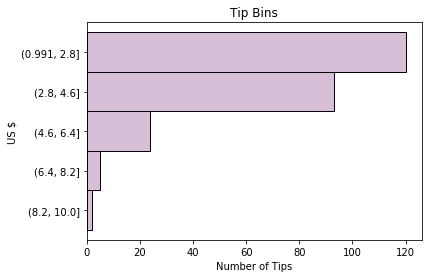

In [83]:
# I can plot my Series returned from `.value_counts()`

pd.cut(tip, 5).value_counts().plot.barh(color='thistle', width=1, ec='black')

plt.title('Tip Bins')
plt.xlabel('Number of Tips')
plt.ylabel('US $')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
plt.show()

##### Specify Bin Edges and Labels

The `.cut()` has parameters that make it versatile; I can define my own bins and labels.

In [84]:
# Define bin edges.
bin_edges = [0, 2, 4, 6, 8, 10.01]

# Create a list of bin labels; you should have one less than bin edges.
bin_labels = ['$0-1.99', '$2.00-3.99', '$4.00-5.99', '$6.00-7.99', '$8.00-10.00']

# Use the .cut() function to create 5 bins as defined and labeled and create Series of value_counts sorted by index value.
pd.cut(tip, bins=bin_edges, labels=bin_labels).value_counts().sort_index()

$0-1.99         78
$2.00-3.99     125
$4.00-5.99      34
$6.00-7.99       5
$8.00-10.00      2
Name: tip, dtype: int64

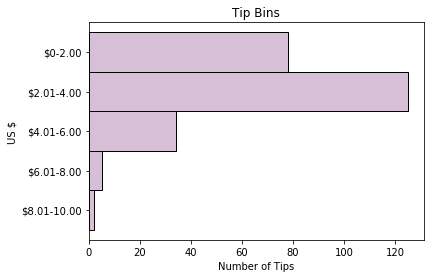

In [85]:
# Define bin edges
bin_edges = [0, 2, 4, 6, 8, 10.01]

# Create a list of bin labels
bin_labels = ['$0-2.00', '$2.01-4.00', '$4.01-6.00', '$6.01-8.00', '$8.01-10.00']

# Use the .cut() function to create my 5 equal-sized bins and create a horizontal bar plot to visualize value_counts().
pd.cut(tip, bins=bin_edges, labels=bin_labels).value_counts().sort_index().plot.barh(color='thistle', width=1, ec='black')

# Axes labels and plot title
plt.title('Tip Bins')
plt.xlabel('Number of Tips')
plt.ylabel('US $')

# Reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

# Clean up plot display
plt.show()